# Домашнее задание 2

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 17 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_2

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим проекцию на единичном $\ell_1$-шар:
\begin{equation*}
    \text{proj}_{C}(x) = \arg\min_{y \in C} \|x-y\|^2,
\end{equation*}
где $C = \{x ~|~ \|x\|_1 \leq 1 \}$.

__(а)__ Найдите выражение для такой проекции в явном виде.

#### Решение: 
Будем минимизировать $\frac{1}{2}\|x-y\|^2 \\ $
Построим соответствующий Лагранжиан: $ \mathcal{L}(x,\lambda) = \frac{1}{2}\|x-y\|^2 + \lambda(\|x\|_1 - 1) \\ $
Тогда следует: $\mathcal{L}(x,\lambda) = \sum\limits_{i=1}^n(\frac{1}{2}(x_i-y_i)^2 + \lambda(|x|_i)) - \lambda$, положим$l_i(x_i, \lambda) =  \frac{1}{2}(x_i-y_i)^2 + \lambda(|x|_i) \\ $
Применим теорему Каруша-Куна-Таккера: $\nabla_x \mathcal{L}(x,\lambda) = 0 \\ $
Поскольку $L_1$ - норма недиффицеренцируема, используем субградиентную форму: $\partial_xl_i = 0 \Rightarrow 0 \in x_i - y_i +\lambda \cdot sign(x_i)\\ $ 
Тогда $x_i = sign(y_i)\cdot max\{|y_i| - \lambda,0\} \\ $  
Также из ККТ получаем: $\lambda(\|x\|_1-1) = 0,  \|x\|_1-1 \leq 0, \lambda \geq 0$ и отдельно рассмотрим случаи $\lambda = 0 $ и $\lambda \geq 0 \\ $
$\lambda = 0 \Rightarrow \|x\|_1 = \|y\|_1 \leq 1 \Rightarrow y \in S \\ $
$\lambda > 0 \Rightarrow |x_1|+|x_2|+...+|x_n| = 1 \Rightarrow x_i = \sum\limits_{i=1} max\{|y_i|-\lambda,0\} = 1 \\ $.
Рассмотрим 3 случая: $1) y_i > \lambda, \quad 2) |y_i| \leq \lambda, \quad 3) y_i < \lambda \\ $

$ 1) |y_i| \leq \lambda \Rightarrow sign(y_i) = 1 \Rightarrow x_i = y_i - \lambda$ $\\ $
$ 2) y_i > \lambda \Rightarrow max\{|y_i|-\lambda,0\} = 1 \Rightarrow x_i = 0 $ $\\ $
$ 3) |y_i| \leq \lambda \Rightarrow sign(y_i) = -1 \Rightarrow x_i = y_i + \lambda $ $\\ $
#### Ответ: 
$\|y\|_1 \leq 1$, то $x = y$ $\\$
Иначе:
$x_i = sign(y_i)\cdot max\{|y_i| - \lambda,0\} = \begin{cases}
y_i - \lambda ,& y_i > \lambda \\
0 ,& y_i \in [-\lambda, \lambda] \\
y_i + \lambda, &y_i > \lambda.
\end{cases}$, где $ \lambda_i$ ищется из уравнения $\sum\limits_{i=1}^{n}max\{|y_i| - \lambda,0\} = 1$

source: https://angms.science/doc/CVX/Proj_l1.pdf

__(б)__ Сравните:
\begin{equation*}
    \text{proj}_C (x) \quad \text{и} \quad \text{prox}_{\lambda \mathbb{I}_C} (x),
\end{equation*}
где $\lambda > 0$, а $\mathbb{I}_C$ - индикаторная функция множества $C$:
$$
\mathbb{I}_C = 
\begin{cases}
0 ,& x \in C \\
+\infty, &x \notin C.
\end{cases}
$$
Являются ли данные операторы эквивалентными для любых $\lambda > 0$ и выпуклых $C$?

#### Решение: 
$\text{prox}_{\lambda \mathbb{I}_C} (x) = \arg\underset{y \in C}{\min} (\frac{1}{2}\|x-y\|^2 + \lambda \mathbb{I}_C) = \arg\underset{y \in \mathbb{R}^d}{\min} \frac{1}{2}\|x-y\|^2 = \text{proj}_C (x)$

source f.i.: https://class.ece.uw.edu/546/2014spr/lectures/proxgrad.pdf

## Задача 2

Рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i),
\end{equation}
где $l$ - функция потерь, $g$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ - выборка данных из векторов признаков $x_i$ и меток $y_i$.

Далее будем рассматривать линейной модель $g(w, x) = w^T x$ и квадратичную функцию потерь $l(z, y) = (z-y)^2$.

__(а)__ Запишите задачу минимизации эмпирического риска с линейной моделью  и квадратичной функцией потерь в векторно-матричном виде, используя $X$ - матрицу из векторов $\{x_i\}$ и вектор $y$ - из $\{y_i\}$.

#### Решение:
Постановка задачи: $\mathcal{L(\omega)} = \frac{1}{n}\|X\omega-y\|^2$

__(б)__ К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$:

In [1]:
dataset = "mushrooms.txt" 


In [2]:
import numpy as np
from math import log, exp, ceil, sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import LinearRegression
import time 
from scipy.stats import special_ortho_group  


In [3]:
from sklearn.datasets import load_svmlight_file
import numpy as np
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
print(n, d)

8124 112


Разделите (лучше случайно) данные (а значит $X$ и $y$) на две части: обучающую и тестовую (примерно в отношении $4$ к $1$). Опишите, как это было сделано.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print(f"Классы в y_train:\n{y_train}")
print(f"Классы в y_test:\n{y_test}")

Классы в y_train:
[1. 1. 1. ... 2. 1. 2.]
Классы в y_test:
[2. 1. 1. ... 1. 1. 1.]


__(в)__ Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации. Будет ли задача выпуклой? Сильно выпуклой?

#### Решение: 
$\|\nabla f(\omega_1) - \nabla f(\omega_2)\| \leq L \|\omega_1-\omega_2\| \\ $ 
Вычислим градиент: $\nabla f (\omega) =  \frac{2}{n}X^T(X\omega-y) \\ $

$\|\nabla f(\omega_1) - \nabla f(x_0)\| = \|\frac{2}{n}X^T(X\omega_1-y) - \frac{2}{n}X^T(X\omega_2-y) \| \leq \|\frac{2}{n}X^TX\|\cdot\|\omega_1 - \omega_2\| \\ $
Тогда $L = \frac{2}{n}\|X^TX\|$

Вычислим гессиан: $\nabla^2 f (\omega) =  \frac{2}{n}X^TX \\ $
Произведение матрицы на транспонированную всегда выдаст положительно полуопределенную матрицу, то есть данная задача является выпуклой.  $ \\ $
Для сильной выпуклости необходимо требовать линейную независимость векторов, составляющую матрицу А.

In [5]:
A = X.T.dot(X)
X_all = X
X = X_train

y_all = y
y = y_train

n_all = n
d_all = d
n, d = X.shape

__(г)__ Используя материалы прошлого ДЗ (по желанию), решите задачу оптимизации/обучите модель машинного обучения с помощью градиентного спуска. Изобразите график сходимости. Какой критерий сходимости будет использовать? Сделайте вывод. Опишите проблемы, с которыми пришлось столкнуться.

In [6]:
L = 100
#x_0 = np.linalg.solve(X.T.dot(X),X.T.dot(y))
#x_0 = np.linalg.solve(X,y)
x_0 = np.linalg.pinv(X) @ y
def f(omega):
    return 1/n*(X.dot(omega)-y).T.dot(X.dot(omega)-y)
print (f(x_0))

0.001151615119820671


In [7]:
def gradient(omega):
    return ((2/n*X.T).dot(X.dot(omega) - y))
start = np.ones(d)

values_x = []
values_y = []
values_y2 = []
values_y3 = []
masvector = []
def gradient_descent2(start, learn_rate, n_iter, tolerance):
    values_x = []
    values_y = []
    values_y2 = []
    values_y3 = []
    vector = start
    for i in range(n_iter):
        diff = -learn_rate * gradient(vector)
        #if np.all((vector-x_0).dot(vector-x_0) <= tolerance):
        #    break
        vector = vector + diff
        if (i % 100 == 0):
            values_y2.append(float((f(vector)-f(x_0))*(f(vector)-f(x_0))))
            values_y3.append(float((gradient(vector).T).dot(gradient(vector))))
            values_x.append(i)
            masvector.append(vector)
    return vector, values_x, values_y2, values_y3
vector, values_x, values_y2, values_y3 = gradient_descent2(start, 1/L,10001,1e-7)
#print(vector, gradient(vector))
print(f(vector))


0.008432649466417535


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_12967/205567372.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


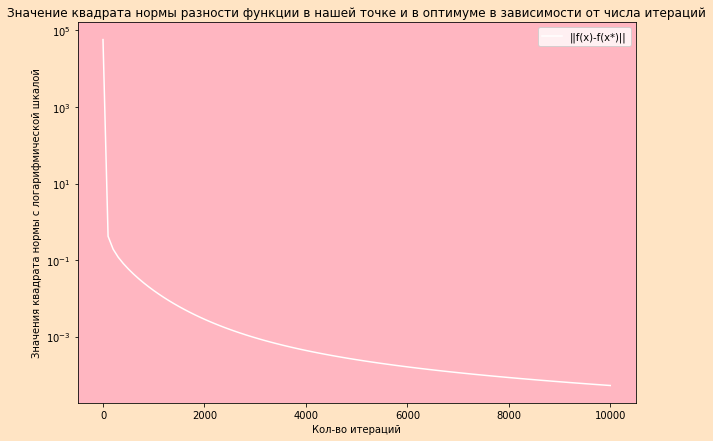

Значение квадрата нормы разности функции в нашей итоговой точке и в оптимуме:  5.301346115632323e-05


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_12967/205567372.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


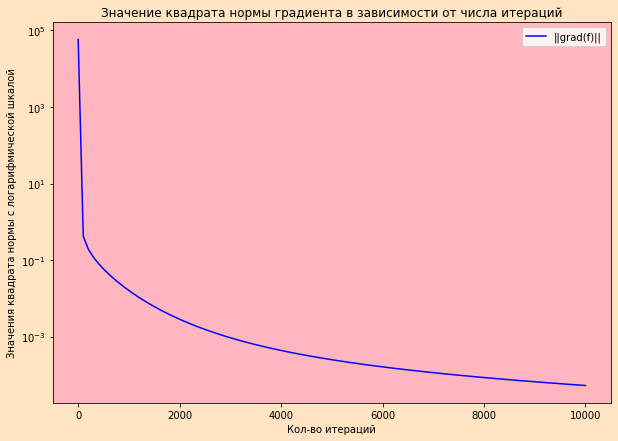

Значение квадрата нормы градиента в итоговой точке:  7.801657842120048e-05


In [8]:
import matplotlib.pyplot as plt
from matplotlib import ticker

plt.figure(figsize=(10,7), facecolor = "bisque") 
plt.plot(values_x, values_y2, 'w')
plt.legend(['||f(x)-f(x*)||'])
ax = plt.axes()
ax.set_facecolor("lightpink")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("Кол-во итераций")
plt.ylabel("Значения квадрата нормы с логарифмической шкалой")
plt.title('Значение квадрата нормы разности функции в нашей точке и в оптимуме в зависимости от числа итераций')
plt.show()
print('Значение квадрата нормы разности функции в нашей итоговой точке и в оптимуме: ', (f(vector)-f(x_0))*(f(vector)-f(x_0)))
            
plt.figure(figsize=(10,7), facecolor = "bisque") 
plt.plot(values_x, values_y2, 'b')
plt.legend(['||grad(f)||'])
ax = plt.axes()
ax.set_facecolor("lightpink")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("Кол-во итераций")
plt.ylabel("Значения квадрата нормы с логарифмической шкалой")
plt.title('Значение квадрата нормы градиента в зависимости от числа итераций')
plt.show()

print('Значение квадрата нормы градиента в итоговой точке: ', (gradient(vector).T).dot(gradient(vector)))

### Вывод:
В данной модели я сравнил два критерия сходимости: норма разности значений функции в точках и норма градиента. Результат можно видеть на графике: критерии с хорошей точностью оценивают результат. 
### В дальнейших моделях не будем использовать знание $x^*$ для проверки критерия.
### PS
Пришлось столкнуться с проблемой поиска оптимума - матрица А не является квадратной и нельзя посчитать обратную. Все удачно решилось через np.linalg.pinv(X) @ y

__(д)__ Как использовать итоговую модель для предсказания? Ответив на вопрос, сделайте предсказания на тестовой выборке. Сравните с реальными метками. Количество правильно угаданных меток есть точность/accuracy вашей модели. Запустите еще раз процесс обучения из пункта г), постройте как меняется точность модели от номера итерации градиентного спуска (измеряйте не каждую итерацию, а, например, каждую 100 или 1000). 

In [9]:
y_pract = X_test.dot(vector)


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
#print(model.coef_, model.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Выведем корень среднеквадратичной ошибки. Будем считать ответом машины тот, к которому она ближе. 

In [11]:
A = np.unique(y_train)
print(A) # всевозможные уникальные значения, которые может принимать выборка
def bliz(x): # определяем, к какому значению из тестовой выборки ближе всего наше
    rasst = abs(x - A[0])
    j = 0
    for i in range(1, len(A)):
        if abs(x - A[i]) < rasst:
            j = i
            rasst = abs(x - A[i])
    return A[j]


[1. 2.]


In [12]:
from sklearn import metrics 
# выведем корень среднеквадратической ошибки
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pract))
rmse0 = rmse
print('Root Mean Squared Error (RMSE):', rmse)
res = 0
for i in range(len(y_test)):
    if(bliz(y_pract[i]) != y_test[i]):
        res += 1
        print(y_pract[i], bliz(y_pract[i]),y_test[i])
print("Количество неправильных ответов на тестовой выборке = ", res)


Root Mean Squared Error (RMSE): 0.10475858205658561
1.3836165728356282 1.0 2.0
1.3727677099074838 1.0 2.0
1.7264321845240824 2.0 1.0
1.3948294223887467 1.0 2.0
1.3474662575751108 1.0 2.0
2.537073829032566 2.0 1.0
1.3481682202625473 1.0 2.0
1.3497954969095387 1.0 2.0
1.3638840996887929 1.0 2.0
1.3369553707094286 1.0 2.0
Количество неправильных ответов на тестовой выборке =  10


#### Для оценивания критерия выше выведены все расхождения. 
Это же оформляется в данном случае с помощью построения гиперплоскости между двумя классами:

In [13]:
schett = 0
for j in range(len(y_test)):
    aaa = (y_test[j] * 2 - 3)*((vector.dot(X_test[j])) * 2 - 3)
    if(abs(X_test[j].dot(vector) - y_test[j]) >= 0.5):
        print(aaa, y_test[j], y_pract[j])
    if (aaa) < 0:
        schett += 1
print("Количество ошибок = ", schett)

-0.23276685432874267 2.0 1.3836165728356282
2.0283556704986925 2.0 2.514177835249346
-0.25446458018503204 2.0 1.3727677099074838
-0.4528643690481662 1.0 1.7264321845240824
-0.21034115522250563 2.0 1.3948294223887467
-0.3050674848497774 2.0 1.3474662575751108
-2.0741476580651312 1.0 2.537073829032566
-0.3036635594749053 2.0 1.3481682202625473
-0.3004090061809217 2.0 1.3497954969095387
-0.2722318006224129 2.0 1.3638840996887929
-0.3260892585811419 2.0 1.3369553707094286
Количество ошибок =  10


Действительно, может быть такое, что разница будет больше 0.5, но по новому критерию ответ будет определяться верно (у меня в примере получилось, что алгоритм выдал 2.51417, но гиперплоскость разделила правильно.

#### Будем наблюдать среднеквадратичную ошибку в зависимости от итерации:


In [14]:
y_pract2 = X_test.dot(masvector[10])
y_pract3 = X_test.dot(masvector[50])
y_pract4 = X_test.dot(masvector[-1])

rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_pract2))
rmse3 = np.sqrt(metrics.mean_squared_error(y_test, y_pract3))
rmse4 = np.sqrt(metrics.mean_squared_error(y_test, y_pract4))
 

print('N_iter = 1000 => (RMSE):', rmse2)
print('N_iter = 5000  => (RMSE):', rmse3)
print('N_iter = 10000 => (RMSE):', rmse4)

N_iter = 1000 => (RMSE): 0.36798566817239825
N_iter = 5000  => (RMSE): 0.14382027130734668
N_iter = 10000 => (RMSE): 0.10475858205658561


#### Построим модель с помощью встроенных функций python: 

In [15]:
y_pred = model.predict(X_test)
from sklearn import metrics
#print(y_pred[:5])
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rmse)
res = 0
for i in range(len(y_test)):
    if(bliz(y_pred[i]) != y_test[i]):
        res += 1
        print(y_pred[i], bliz(y_pract[i]),y_test[i])
print("Количество неправильных ответов на тестовой выборке с помощью встроенных функций = ",res)

Root Mean Squared Error (RMSE): 0.03482629124286271
Количество неправильных ответов на тестовой выборке с помощью встроенных функций =  0


#### Результат получился явно лучше, есть к чему стремиться, однако наш метод тоже довольно неплох


__(e)__ Теперь рассмотрим эту же задачу обучения на $\ell_1$-шаре с радиусом $\lambda$. Повторите пункты г) и д) только теперь градиентный спуск должен быть модифицирован с помощью оператора проекции. Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Удалось ли улучшить процесс обучения/точность модели на тестовой выборке? 

In [16]:
#X = X_all
#y = y_all

#n, d = X.shape

In [17]:
values_x = []
values_y = []
radius = 1

def p(c, i): #g'(l)/2
    return(i-d)*abs(c[i])+sum(abs(c[k]) for k in range(i+1, d+1)) - radius

def projection(yy):
    c = np.sort(abs(yy))
    c = np.insert(c, 0, 0)
    #print(c)
    g = []
    k = 0
    for i in range(d+1):
        g.append(p(c, i))
        if(g[i] >= 0):
            k = i
    mu = (sum(abs(c[i]) for i in range(k+1, d+1)) - radius)/(d-k)
    
    summa = np.sum(abs(yy))
    #mu = max(0,(summa - 1)/d)
    if (summa > radius):
        for j in range (d):
            if (yy[j] > mu):
                yy[j] = yy[j] - mu
                #print('1')
            elif (yy[j] < - mu):
                yy[j] = yy[j] + mu
                #print('2')
            else:
                #print(yy[j], mu)
                yy[j] = 0
                #print('3')
    #print(yy, mu)
    return yy


def gradient_descent_proj(start, learn_rate, n_iter, tolerance):
    values_x = []
    values_y = []
    vector = start
    for i in range(n_iter):
        diff = -learn_rate * gradient(vector)
        vector = projection(vector + diff)
        if (i % 100 == 0):
            #print(vector)
            values_y.append(float((gradient(vector).T).dot(gradient(vector))))
            values_x.append(i)
    return vector, values_x, values_y
vector1, values_x, values_y1 = gradient_descent_proj(start, 1/L,1001,1e-7)
radius = 0.1
vector2, _, values_y2 = gradient_descent_proj(start, 1/L,1001,1e-7)
radius = 10
vector3, _, values_y3 = gradient_descent_proj(start, 1/L,1001,1e-7)
radius = d
vector4, _, values_y4 = gradient_descent_proj(start, 1/L,1001,1e-7)
radius = sum(abs(x_0))
vector5, _, values_y5 = gradient_descent_proj(start, 1/L,1001,1e-7)
#print(vector, gradient(vector))
#print(f(vector))


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_12967/1465466777.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


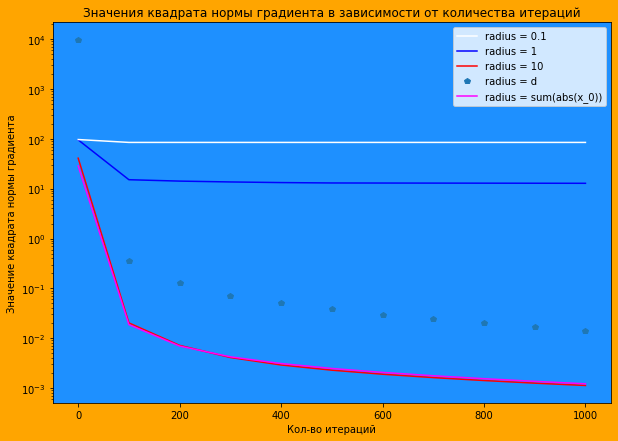

In [18]:
plt.figure(figsize=(10,7), facecolor = "orange") 
line1, = plt.plot(values_x, values_y1, 'b')
line2, = plt.plot(values_x, values_y2, 'w')
line3, = plt.plot(values_x, values_y3, 'r')
line4, = plt.plot(values_x, values_y4, 'p')
line5, = plt.plot(values_x, values_y5, 'magenta')
plt.legend((line2, line1, line3, line4, line5), ['radius = 0.1', 'radius = 1', 'radius = 10', 'radius = d', 'radius = sum(abs(x_0))', ])
ax = plt.axes()
ax.set_facecolor("dodgerblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("Кол-во итераций")
plt.ylabel("Значение квадрата нормы градиента")
plt.title('Значения квадрата нормы градиента в зависимости от количества итераций')
plt.show()



In [19]:
y_pract1 = X_test.dot(vector1)
y_pract2 = X_test.dot(vector2)
y_pract3 = X_test.dot(vector3)
y_pract4 = X_test.dot(vector4)
y_pract5 = X_test.dot(vector5)

rmse = rmse0
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, y_pract1))
rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_pract2))
rmse3 = np.sqrt(metrics.mean_squared_error(y_test, y_pract3))
rmse4 = np.sqrt(metrics.mean_squared_error(y_test, y_pract4))
rmse5 = np.sqrt(metrics.mean_squared_error(y_test, y_pract5))

print('Root Mean Squared Error (RMSE):', rmse)
print('radius = 0.1 => (RMSE):', rmse2)
print('radius = 1 => (RMSE):', rmse1)
print('radius = 10 => (RMSE):', rmse3)
print('radius = d => (RMSE):', rmse4)
print('radius = sum(abs(x_0)) => (RMSE):', rmse5)


Root Mean Squared Error (RMSE): 0.10475858205658561
radius = 0.1 => (RMSE): 1.5041787946098184
radius = 1 => (RMSE): 0.7288137054933985
radius = 10 => (RMSE): 0.13866873789312506
radius = d => (RMSE): 0.36798566817239825
radius = sum(abs(x_0)) => (RMSE): 0.14147948783032663


#### Вывод:
Итог: Из полученных результатов видно, что наилучшим радиусом является первая норма итоговой точки (решения, которое мы нашли встроенными методами). При маленьких радиусах итоговая точка лежит вне их и поэтому итоговый результат будет включать в себя отклонение. А при слишком больших радиусах данный метод не дает вклада в результат

In [20]:

res = 0
for j in range(len(y_test)):
    aaa = (y_test[j] * 2 - 3)*((vector.dot(X_test[j])) * 2 - 3)
    if(abs(X_test[j].dot(vector) - y_test[j]) >= 0.5):
        print(aaa, y_test[j], y_pract3[j])
    if (aaa) < 0:
        res += 1
print("Количество неправильных ответов на тестовой выборке (c лучшим радиусом) = ", res)

-0.23276685432874267 2.0 1.6446476411390814
2.0283556704986925 2.0 2.0175203965110557
-0.25446458018503204 2.0 1.6390534602991602
-0.4528643690481662 1.0 1.8431709668649745
-0.21034115522250563 2.0 1.6685492109098627
-0.3050674848497774 2.0 1.672119225800126
-2.0741476580651312 1.0 1.844901695592265
-0.3036635594749053 2.0 1.6785560688117722
-0.3004090061809217 2.0 1.701168764909356
-0.2722318006224129 2.0 1.6442014296376088
-0.3260892585811419 2.0 1.654654499040991
Количество неправильных ответов на тестовой выборке (c лучшим радиусом) =  10


#### Таким образом, мы значительно улучшили свой результат!

__Бонусные пункт__

__(ж)__ Снова рассмотрим задачу обучения без ограничений, но добавим к ней регуляризатор 1) $\lambda \| x \|_1$ c $\lambda  > 0$, 2) $\lambda \| x \|_2$ c $\lambda  > 0$. Сможем ли для новой задачи с регуляризатором использовать честный градиентный спуск без модификаций? Почему? Предложите свои идеи, как модифицировать градиентный спуск для новой задачи. Проведите для него эксперименты из пунктов г) и д).  Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Сравните результаты с пунктом e).

Регуляризатор портит константу $L$ (и $\mu$), поэтому будем использовать градиентный спуск с модификацией, изученной на семинаре: $x^{k+1} = prox_{\gamma_r}(x^k - \gamma \nabla f(x^k))$, где $ prox_{\gamma_r}(y) = argmin_{x \in \mathbb{R}^d}(\frac{1}{2} \|x^k - \gamma\nabla f(x^{k}) - x\|^2 + \lambda r), ~ r = \lambda \|x\|_1  $ или $~ r = \lambda \|x\|_2$.
$ \\ $

Теперь новую точку в каждой итерации будем искать по следующему алгоритму: 
\begin{equation}
x^{k + 1} = x^{opt} =  x^{k} - \gamma \nabla f(x^k) - \lambda \gamma \nabla \|x^{k + 1}\|_i \\
\end{equation}
Тогда для первой нормы:
\begin{equation}
x^{k + 1}_i = \begin{cases}
x^{k}_i - \gamma\nabla f(x^k)_i - \lambda \gamma; \frac{x^{k}_i}{\gamma} - \nabla f(x^k)_i > \lambda  \\
0; -\lambda \leq \frac{x^{k}_i}{\gamma} - \nabla f(x^k)_i \leq \lambda \\
x^{k}_i - \gamma\nabla f(x^k)_i + \lambda \gamma;  \frac{x^{k}_i}{\gamma} - \nabla f(x^k)_i < - \lambda 
\end{cases}
\end{equation}
Для второй нормы: 
\begin{equation}
x^{k + 1} = \frac{x^{k} - \gamma \nabla f(x^k)}{1 + 2\lambda \gamma}
\end{equation}

In [21]:
n, d = X.shape
def gradient(omega):
    return ((2/n*X.T).dot(X.dot(omega) - y))

def gradient_descent_regularization_1(start, n_iter, gamma, llambda):
    values_x = []
    values_y = []
    vector = start
    begin_time = time.time()
    timeprogGDR = []
    grad = gradient(vector)
    vector_list = []
    for i in range(n_iter):
        for j in range(d):
            lmbdagamma = llambda * gamma
            beta = vector[j] - gamma*grad[j]
            if(beta > lmbdagamma):
                vector[j] = (beta - lmbdagamma)
            elif(beta < -lmbdagamma):
                vector[j] = (beta + lmbdagamma)
            else:
                vector[j] = 0
        grad = gradient(vector)
        values_y.append(grad.T.dot(grad))
        values_x.append(i+1)
        if (i % 10 == 0):
            vector_new = np.copy(vector)
            vector_list.append(vector_new)
            timeprogGDR.append(time.time() - begin_time)
    return values_x, values_y, timeprogGDR, vector_list


In [22]:
values_x_1, values_y_1, timeprogGDR_1, vector_list_1 = gradient_descent_regularization_1(np.ones(d), 5500, 1/L, 0.01)


In [23]:
def gradient_descent_regularization_2(start, n_iter, gamma, llambda):
    values_x = []
    values_y = []
    vector = start
    begin_time = time.time()
    timeprogGDR = []
    vector_list = []
    grad = gradient(vector)
    for i in range(n_iter):
        vector = (vector - gamma*grad)/(1 + 2*llambda*gamma)
        grad = gradient(vector)
        values_y.append(grad.T.dot(grad))
        values_x.append(i+1)
        if (i % 10 == 0):
            vector_new = np.copy(vector)
            vector_list.append(vector_new)
            timeprogGDR.append(time.time() - begin_time)
    return values_x, values_y, timeprogGDR, vector_list


In [24]:
values_x_2, values_y_2, timeprogGDR_2, vector_list_2 = gradient_descent_regularization_2(np.ones(d), 5500, 1/L, 0.01)


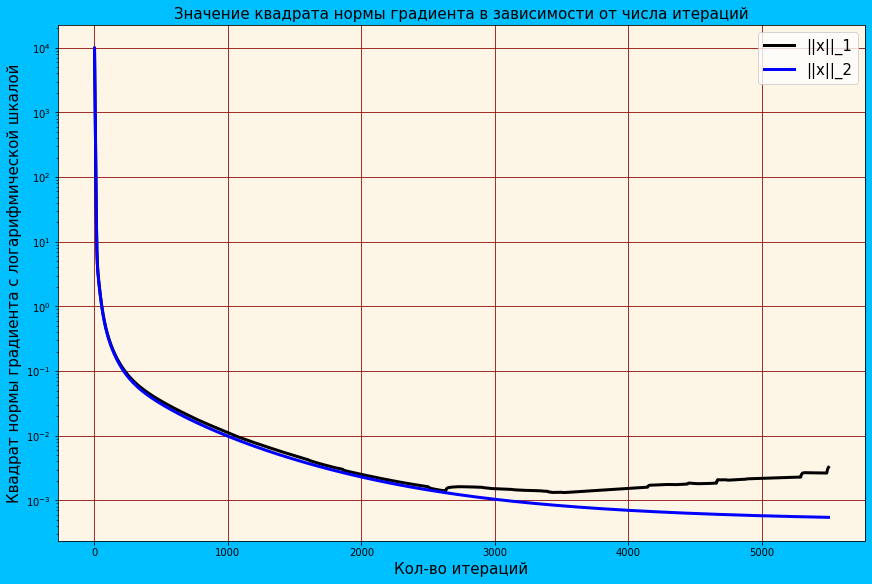

In [25]:
import matplotlib.gridspec as gridspec
fg = plt.figure(figsize=(12, 8), constrained_layout=True, facecolor = "deepskyblue")
fig_ax_1 = fg.add_subplot(facecolor = "oldlace")
fig_ax_1.plot(values_x_1, values_y_1, 'black', linewidth=3, label = '||x||_1')
fig_ax_1.plot(values_x_2, values_y_2, 'blue', linewidth=3, label = '||x||_2')
fig_ax_1.legend(loc="upper right", fontsize=15)
fig_ax_1.semilogy()
fig_ax_1.set_xlabel("Кол-во итераций", fontsize=15)
fig_ax_1.set_ylabel("Квадрат нормы градиента с логарифмической шкалой", fontsize=15)
fig_ax_1.set_title('Значение квадрата нормы градиента в зависимости от числа итераций', fontsize=15)
fig_ax_1.grid(color='darkred')


#### Исследуем точность. Найдем максимальную точность для методов с первой и второй проекциями:


In [26]:
y_pract1 = X_test.dot(vector_list_1[-1])
y_pract2 = X_test.dot(vector_list_2[-1])

rmse = rmse0
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, y_pract1))
rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_pract2))

In [27]:
def precision(x):
    schett = 0
    for j in range(len(y_test)):
        aaa = (y_test[j] * 2 - 3)*((x.dot(X_test[j])) * 2 - 3)
        #if(abs(X_test[j].dot(vector) - y_test[j]) >= 0.5):
            #print(aaa, y_test[j], y_pract[j])
        if (aaa) < 0:
            schett += 1
            #print(y_test[j], x.dot(X_test[j]))
    #print(schett)
    return (len(y_test) - schett)/(len(y_test))*100

In [28]:
precision_list_1 = []
precision_list_2 = []
for i in range (len(vector_list_2)):
    precision_list_2.append(precision(vector_list_2[i]))
    precision_list_1.append(precision(vector_list_1[i]))
    
print("Макимальная точность на первой норме = {:%}".format(max(precision_list_1)/100))
print("Максимальная точность на второй норме = {:%}".format(max(precision_list_2)/100))

Макимальная точность на первой норме = 99.876923%
Максимальная точность на второй норме = 99.815385%


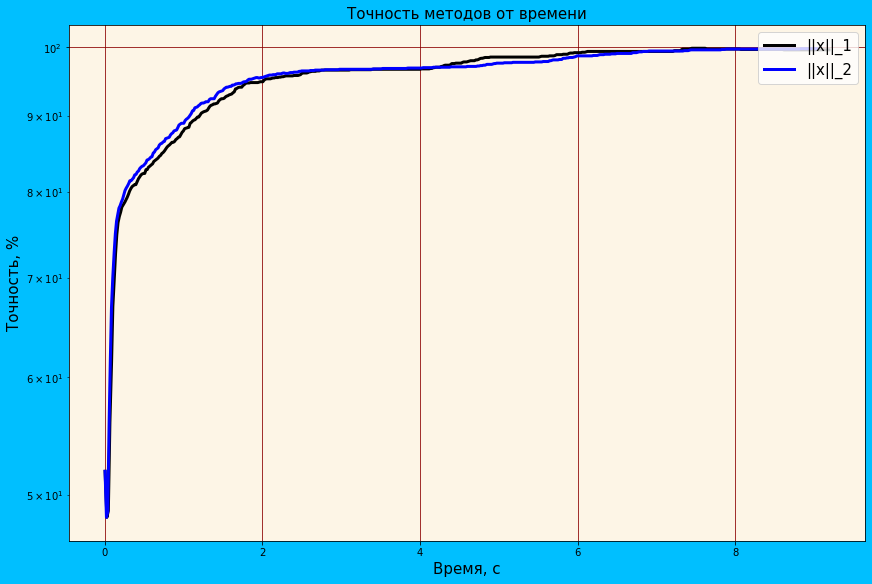

In [29]:
import matplotlib.gridspec as gridspec
fg = plt.figure(figsize=(12, 8), constrained_layout=True, facecolor = "deepskyblue")
fig_ax_1 = fg.add_subplot(facecolor = "oldlace")
fig_ax_1.plot(timeprogGDR_1, precision_list_1, 'black', linewidth=3, label = '||x||_1')
fig_ax_1.plot(timeprogGDR_2, precision_list_2, 'blue', linewidth=3, label = '||x||_2')
fig_ax_1.legend(loc="upper right", fontsize=15)
fig_ax_1.semilogy()
fig_ax_1.set_xlabel("Время, с", fontsize=15)
fig_ax_1.set_ylabel("Точность, %", fontsize=15)
fig_ax_1.set_title('Точность методов от времени', fontsize=15)
fig_ax_1.grid(color='darkred')

#### ВЫВОД:
Данные методы демонстрируют лучшую точность, нежели методы из пунктов д, е (градиентный спуск, задача на $l_1$ - шаре).

__(з)__ Воспользуемся для нашей задачи методом [PCA](https://ru.wikipedia.org/wiki/Метод_главных_компонент). Прочитайте про него подробнее и опишите основную идею.

Метод главных компонент представляет собой ортогональное линейное преобразование, которое отображает данные из исходного пространство признаков в новое пространство меньшей размерности.
При этом решаются две задачи: объединение наиболее важных (с точки зрения минимизации среднеквадратичной ошибки), но более информативных (уменьшение размерности пространства данных) значений в меньшее количество параметров. Вторая же задача заключается в уменьшении шума в данных. 
Для решения этой проблемы МГК ищет пространство, которое наилучшим образом отражает дисперсию данных.

Пользуясь сингулярным разложением матрицы, мы находим  $n$  максимальных сингулярных чисел и раскладываем по их собственным векторам нашу матрицу, выделяя тем самым главные компоненты.

In [30]:
y_train = y_train * 2 - 3
y_test = y_test * 2 - 3

Следующий код запускает PCA для нашего датасета. Убедитесь, что понимаете происходящие.

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca.fit(X_train)  #эта строчка будет работать только если есть матрица X_train
print (pca.explained_variance_ratio_.cumsum())

[0.17105948 0.30230759 0.39600739 0.45841994 0.4986626  0.53641083
 0.56906104 0.59689845 0.62378942 0.64579651 0.66658527 0.68576995
 0.70460434 0.7220873  0.73814119 0.75365943 0.76879975 0.78340769
 0.79714697 0.80931825]


Какое значение n_components разумно поставить?
- Зависит от баланса желаемой точности и времени работы, мы возьмем 20, чтобы добиться хороших результатов с высокой скоростью

Для новой матрицы X_train повторите пункт ж). Измерьте время работы процесса обучения. Постройте график точности решения на тестовой выборке от времени работы для честного X_train и полученного с помощью PCA.

In [32]:


X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)

n, d = np.copy(X_train_new.shape)

def gradient(omega):
    return ((2/n*X_train_new.T).dot(X_train_new.dot(omega) - y_train))
start = np.ones(d)

In [33]:
values_x_3, values_y_3, timeprogGDR_3, vector_list_3 = gradient_descent_regularization_1(np.ones(d), 700, 1/L, 0.01)
values_x_4, values_y_4, timeprogGDR_4, vector_list_4 = gradient_descent_regularization_2(np.ones(d), 700, 1/L, 0.01)


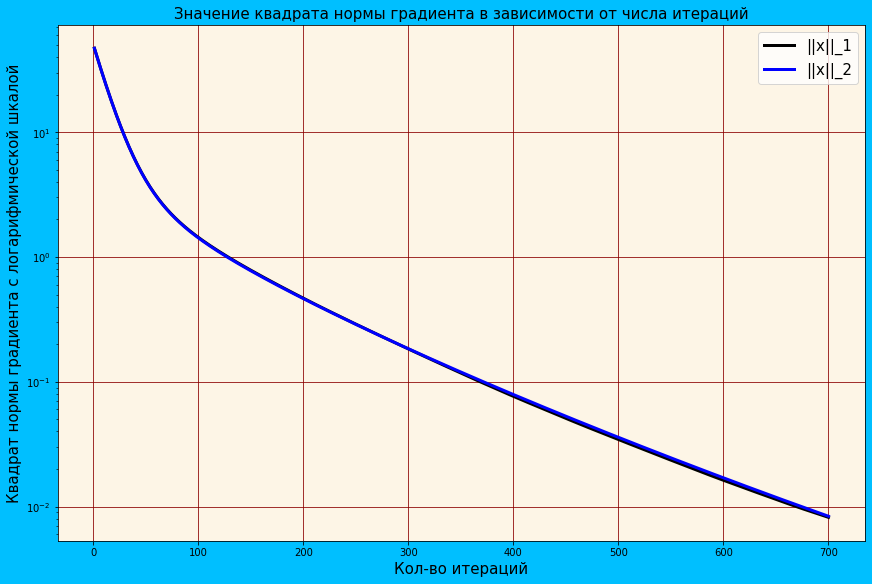

In [34]:
import matplotlib.gridspec as gridspec
fg = plt.figure(figsize=(12, 8), constrained_layout=True, facecolor = "deepskyblue")
fig_ax_1 = fg.add_subplot(facecolor = "oldlace")
fig_ax_1.plot(values_x_3, values_y_3, 'black', linewidth=3, label = '||x||_1')
fig_ax_1.plot(values_x_4, values_y_4, 'blue', linewidth=3, label = '||x||_2')
fig_ax_1.legend(loc="upper right", fontsize=15)
fig_ax_1.semilogy()
fig_ax_1.set_xlabel("Кол-во итераций", fontsize=15)
fig_ax_1.set_ylabel("Квадрат нормы градиента с логарифмической шкалой", fontsize=15)
fig_ax_1.set_title('Значение квадрата нормы градиента в зависимости от числа итераций', fontsize=15)
fig_ax_1.grid(color='darkred')


In [35]:
def precision(x):
    schett = 0
    for j in range(len(y_test)):
        aaa = (y_test[j])*((x.dot(X_test_new[j])))
        #if(abs(X_test[j].dot(vector) - y_test[j]) >= 0.5):
            #print(aaa, y_test[j], y_pract[j])
        if (aaa) < 0:
            schett += 1
            #print(y_test[j], x.dot(X_test[j]))
    #print(schett)
    return (len(y_test) - schett)/(len(y_test))*100

precision_list_3 = []
precision_list_4 = []
for i in range (len(vector_list_4)):
    precision_list_4.append(precision(vector_list_4[i]))
    precision_list_3.append(precision(vector_list_3[i]))
    
print("Макимальная точность на первой норме = {:%}".format(max(precision_list_3)/100))
print("Максимальная точность на второй норме = {:%}".format(max(precision_list_4)/100))

Макимальная точность на первой норме = 95.876923%
Максимальная точность на второй норме = 95.692308%


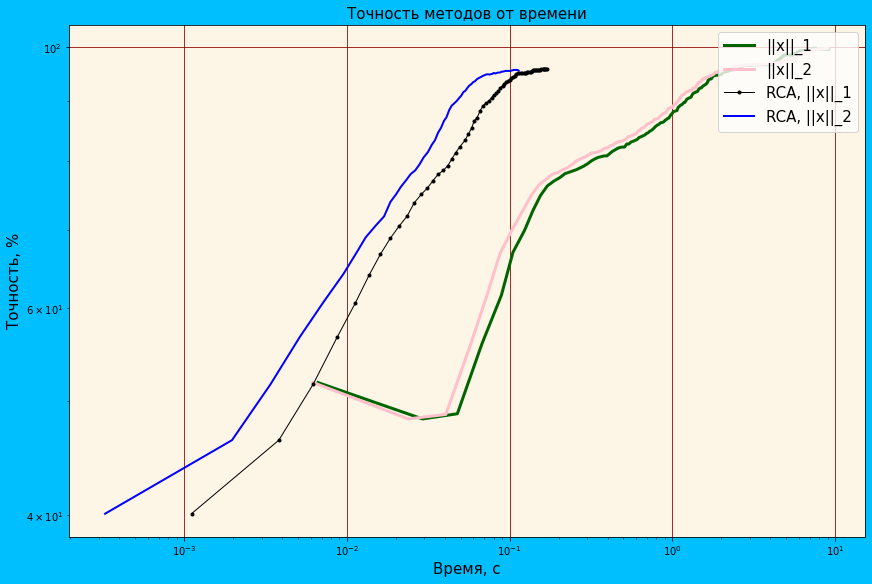

In [36]:
import matplotlib.gridspec as gridspec
fg = plt.figure(figsize=(12, 8), constrained_layout=True, facecolor = "deepskyblue")
fig_ax_1 = fg.add_subplot(facecolor = "oldlace")
fig_ax_1.plot(timeprogGDR_1, precision_list_1, 'darkgreen', linewidth=3, label = '||x||_1')
fig_ax_1.plot(timeprogGDR_2, precision_list_2, 'pink', linewidth=3, label = '||x||_2')
fig_ax_1.plot(timeprogGDR_3, precision_list_3, 'black', linewidth=1, marker = '.', label = 'RCA, ||x||_1')
fig_ax_1.plot(timeprogGDR_4, precision_list_4, 'blue', linewidth=2, label = 'RCA, ||x||_2')
fig_ax_1.legend(loc="upper right", fontsize=15)
fig_ax_1.loglog()
fig_ax_1.set_xlabel("Время, с", fontsize=15)
fig_ax_1.set_ylabel("Точность, %", fontsize=15)
fig_ax_1.set_title('Точность методов от времени', fontsize=15)
fig_ax_1.grid(color='darkred')

#### Логарифмическа шкала по обеим осям может показать разницу нагляднее.

#### Вывод:
Таким образом, данынй метод позволил заметно увеличить скорость работы программы, сильно уменьшить количество итераций, потеряв немного в точности, однако все еще точность является хорошей. Заметим, что баланс точности и времени работы программы можно регулировать размерностью.